In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.84k/2.84k [00:00<00:00, 3.81MB/s]

Extracting files...
Path to dataset files: /Users/nakajimamasahito/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1


In [6]:
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [7]:
numeric_cols = ["Age", "Total Spend", "Items Purchased", "Average Rating", "Discount Applied", "Days Since Last Purchase"]
customer_data_numeric = data[numeric_cols]

In [8]:
customer_data_numeric.fillna(0, inplace=True)

/var/folders/rp/r7rm8rzn5mvdkpykf4c15d540000gn/T/ipykernel_9536/3777110867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data_numeric.fillna(0, inplace=True)


In [9]:
categorical_cols = ["Gender", "City", "Membership Type"]
customer_data_categorical = data[categorical_cols]

In [11]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
customer_data_encoded = encoder.fit_transform(customer_data_categorical)
customer_data_processed = np.concatenate((customer_data_numeric.values, customer_data_encoded), axis=1)
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_processed)
pca = PCA(n_components=2)
customer_data_reduced = pca.fit_transform(customer_data_scaled)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(customer_data_reduced)

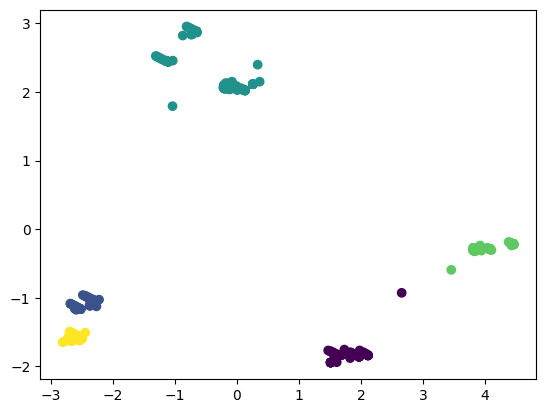

In [12]:
plt.scatter(customer_data_reduced[:,0], customer_data_reduced[:,1], c=clusters, cmap='viridis')
plt.show()